In [45]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# nltk.download('vader_lexicon')

In [46]:
df = pd.read_csv("output.csv")

In [47]:
# Create an object
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review in the DataFrame
df[['negative', 'neutral', 'positive', 'compound']] = df['Review'].apply(lambda review: pd.Series(sid.polarity_scores(review)))

# Classify each review as 'Positive' or 'Negative' based on the compound score threshold of 0.5
df['sentiment_class'] = df['compound'].apply(lambda score: 'Positive' if score >= 0.5 else 'Negative')

# Print the results
df

,Review,negative,neutral,positive,compound,sentiment_class
0,I love edible arrangements! They have somethin...,0.0,0.727,0.273,0.8975,Positive
1,"Food was good, service was good. Order was de...",0.0,0.538,0.462,0.8221,Positive
2,Big office hit! Everyone was happy with this s...,0.0,0.715,0.285,0.6114,Positive
3,It arrived on time and it was delicious. Would...,0.0,0.730,0.270,0.5719,Positive
4,"Fruit was fresh, arrangement was beautiful, an...",0.0,0.535,0.465,0.8271,Positive
...,...,...,...,...,...,...
3955,The fresh fruit salad and chocolate dipped str...,0.0,0.924,0.076,0.3182,Negative
3956,This was a grat treat for the office. It was s...,0.0,0.560,0.440,0.9209,Positive
3957,My order was ready for pick up when i arrived....,0.0,0.660,0.340,0.7712,Positive
3958,"Nice change for a snack, will order from here ...",0.0,0.741,0.259,0.4215,Negative


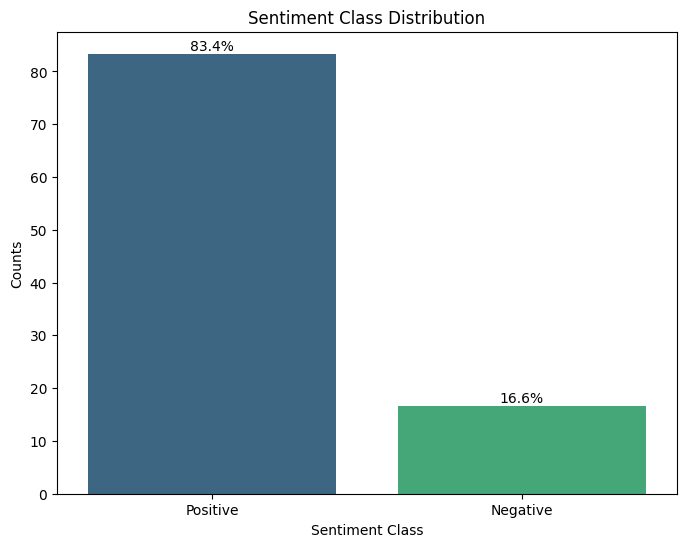

In [57]:
# Calculate the percentage of each sentiment class
sentiment_percentage = df['sentiment_class'].value_counts(normalize=True) * 100

# Convert sentiment_percentage to a DataFrame for easier plotting with hue
sentiment_percentage_df = sentiment_percentage.reset_index()
sentiment_percentage_df.columns = ['sentiment_class', 'percentage']

# Plot the percentages
plt.figure(figsize=(8, 6))
sns.barplot(data=sentiment_percentage_df, x='sentiment_class', y='percentage', hue='sentiment_class', palette='viridis', dodge=False, legend=False)

# Adding title and labels
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Counts')

# Display the percentage values on top of the bars
for index, value in enumerate(sentiment_percentage.values):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

# Display the plot
plt.show()


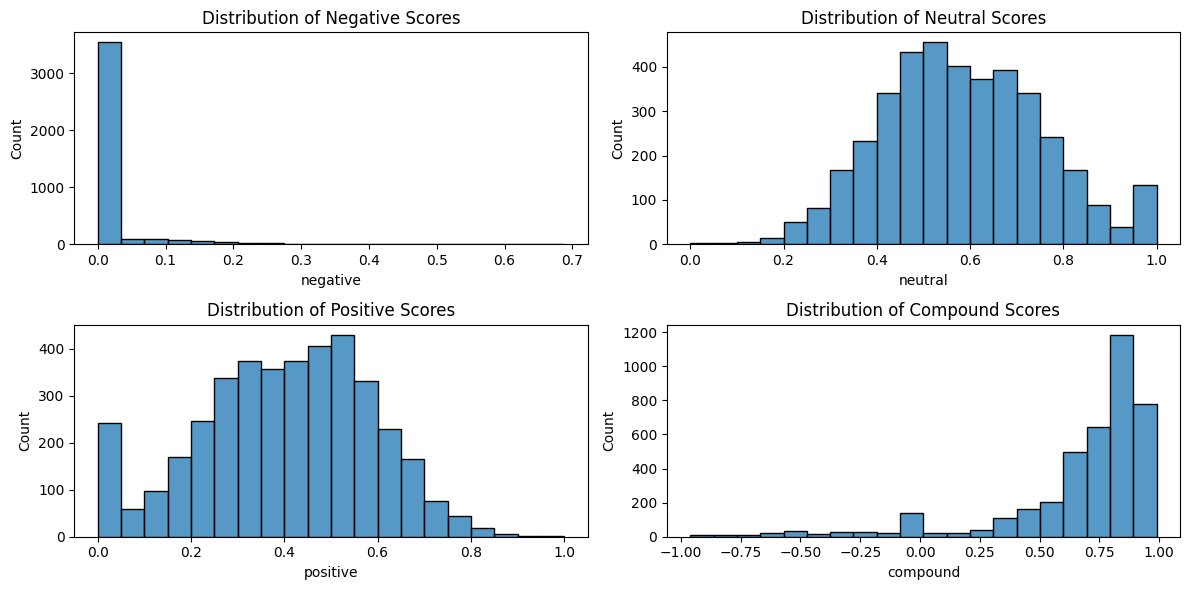

In [49]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['negative'], bins=20)
plt.title('Distribution of Negative Scores')

plt.subplot(2, 2, 2)
sns.histplot(df['neutral'], bins=20)
plt.title('Distribution of Neutral Scores')

plt.subplot(2, 2, 3)
sns.histplot(df['positive'], bins=20)
plt.title('Distribution of Positive Scores')

plt.subplot(2, 2, 4)
sns.histplot(df['compound'], bins=20)
plt.title('Distribution of Compound Scores')

plt.tight_layout()
plt.show()


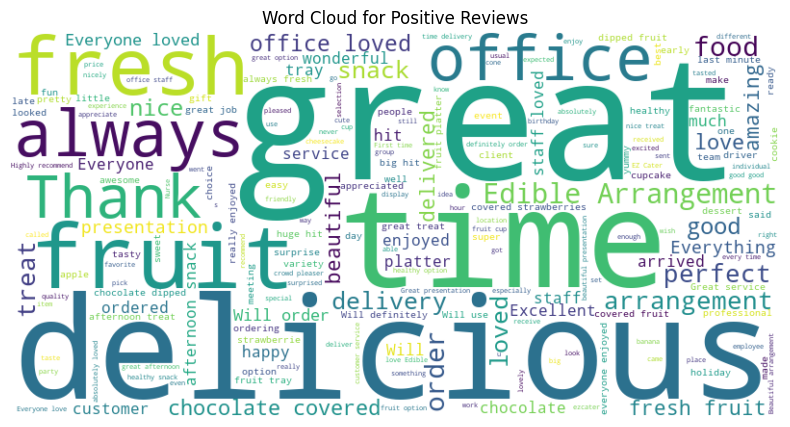

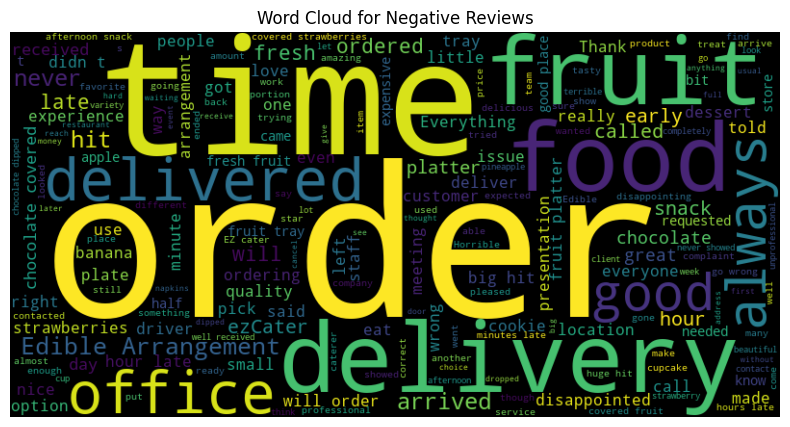

In [50]:

# Generate word cloud for positive reviews
positive_reviews = " ".join(df[df['sentiment_class'] == 'Positive']['Review'].tolist())
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Generate word cloud for negative reviews
negative_reviews = " ".join(df[df['sentiment_class'] == 'Negative']['Review'].tolist())
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()